In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score 
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import copy

D:\Users\MSA\anaconda3\envs\ad\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data=pd.read_csv(r'C:\Users\MSA\Desktop\insurance\insurance.csv')
columns=data.columns

In [3]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
#convert sex and smoker to categorical data
data['sex'] = data['sex'].replace(['female','male'],[0,1])
data['smoker'] = data['smoker'].replace(['yes','no'],[1,0])


In [7]:
#convert region  to categorical data
region=list(data['region'].unique())

dic_region={}

for i in region:
    dic_region[i]=region.index(i)
    
data['region'] = data['region'].replace(dic_region.keys(),dic_region.values())
    

In [8]:
#standardization data
scaler = StandardScaler()
scaler.fit(data)
data = scaler.transform(data)

data=pd.DataFrame(data)

for i in range(len(columns)):
    data.rename(columns={data.columns[i]:columns[i]},inplace=True)


In [9]:
data_gradiant=data.copy()

In [10]:
#adding the bias column to data for stoachastic gradiant decent regression
bias=np.ones((len(data),))
data_gradiant['bias']=bias
data_gradiant_numpy=data_gradiant.to_numpy()
data_gradiant_numpy[:, [len(data_gradiant.columns)-2, -1]] = data_gradiant_numpy[:, [-1, len(data_gradiant.columns)-2]]
data_gradiant=pd.DataFrame(data_gradiant_numpy)
data_gradiant

,0,1,2,3,4,5,6,7
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,-1.343905,1.0,0.298584
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,-0.438495,1.0,-0.953689
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,-0.438495,1.0,-0.728675
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,0.466915,1.0,0.719843
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,0.466915,1.0,-0.776802
...,...,...,...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,1.580926,-0.507463,0.466915,1.0,-0.220551
1334,-1.509965,-1.010519,0.206139,-0.908614,-0.507463,1.372326,1.0,-0.914002
1335,-1.509965,-1.010519,1.014878,-0.908614,-0.507463,-0.438495,1.0,-0.961596
1336,-1.296362,-1.010519,-0.797813,-0.908614,-0.507463,-1.343905,1.0,-0.930362


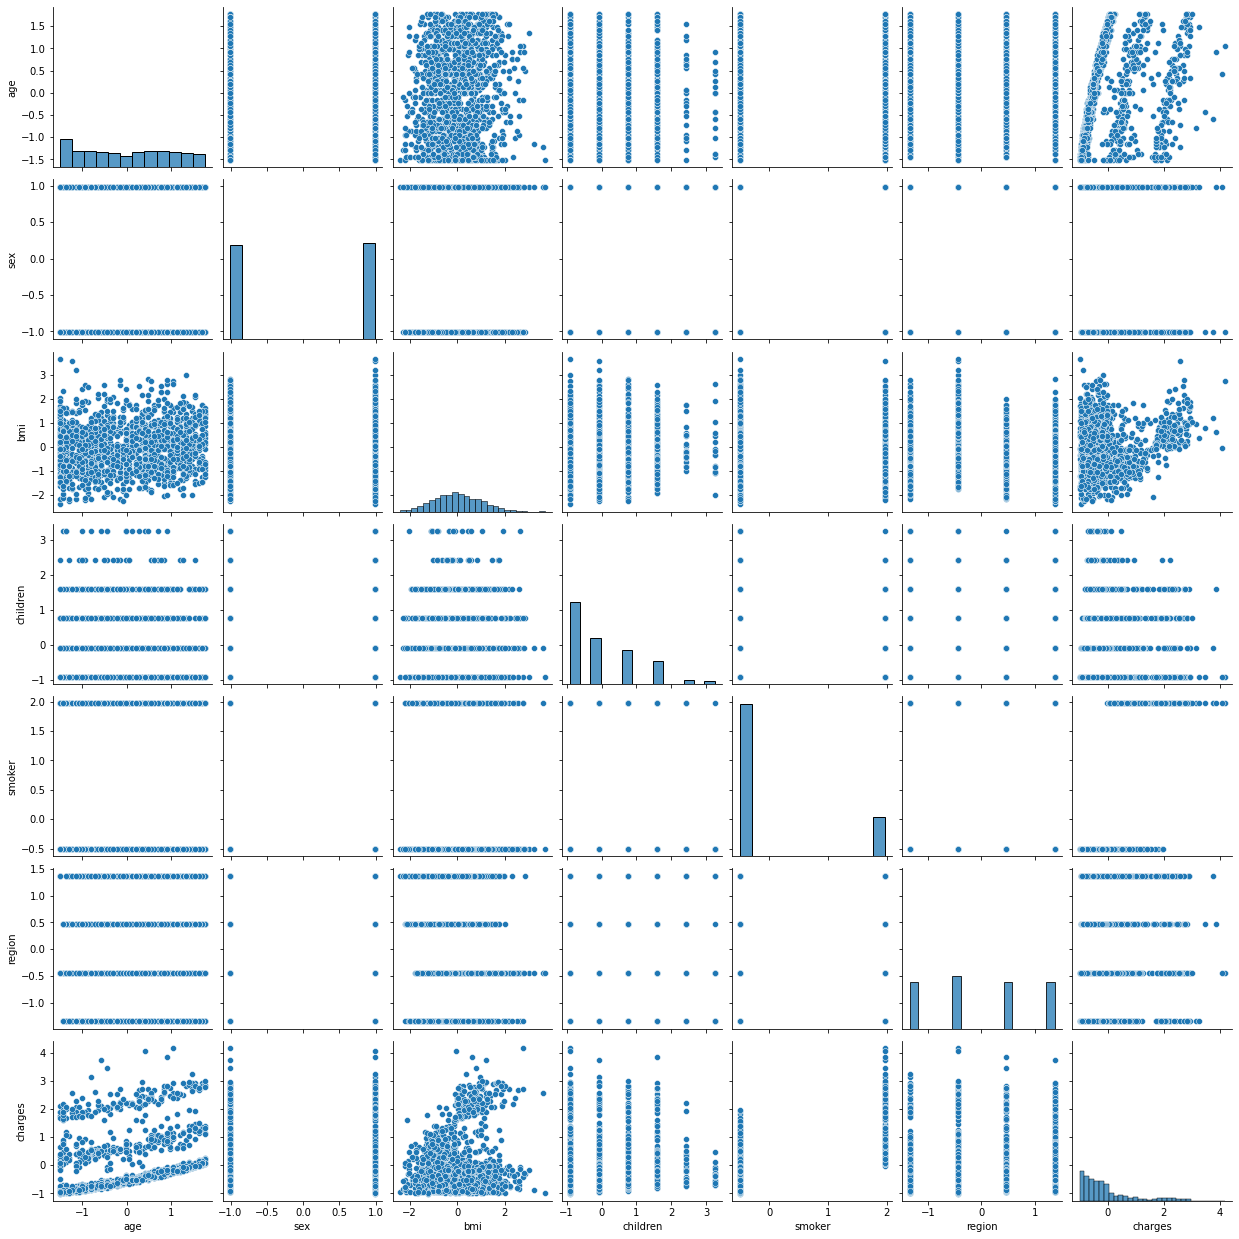

In [11]:
sns.pairplot(data)

D:\Users\MSA\anaconda3\envs\ad\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


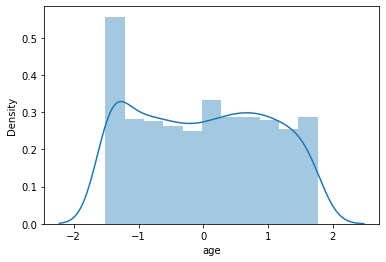

D:\Users\MSA\anaconda3\envs\ad\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


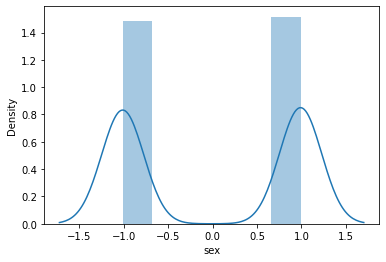

D:\Users\MSA\anaconda3\envs\ad\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


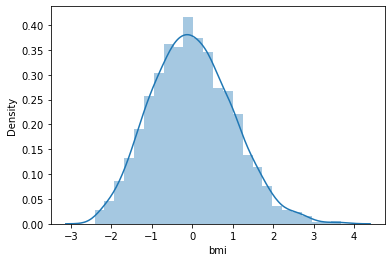

D:\Users\MSA\anaconda3\envs\ad\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


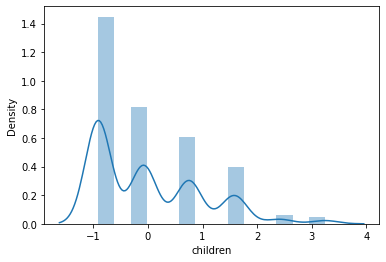

D:\Users\MSA\anaconda3\envs\ad\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


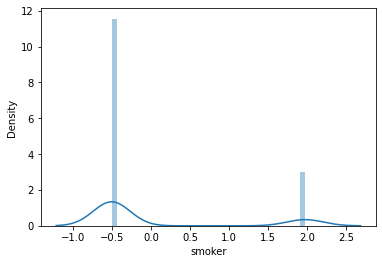

D:\Users\MSA\anaconda3\envs\ad\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


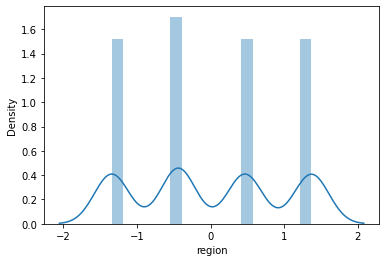

D:\Users\MSA\anaconda3\envs\ad\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


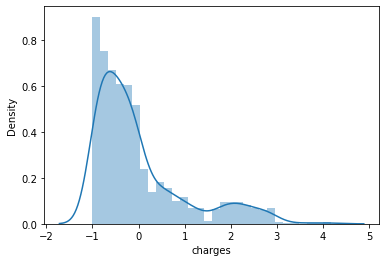

In [12]:
for i in range(len(columns)):
    sns.distplot(data[columns[i]])
    plt.show()    
    

# Considering to correlation matrix,we can understand three feature which are more important than others (smoker,age,bmi)

<AxesSubplot:>

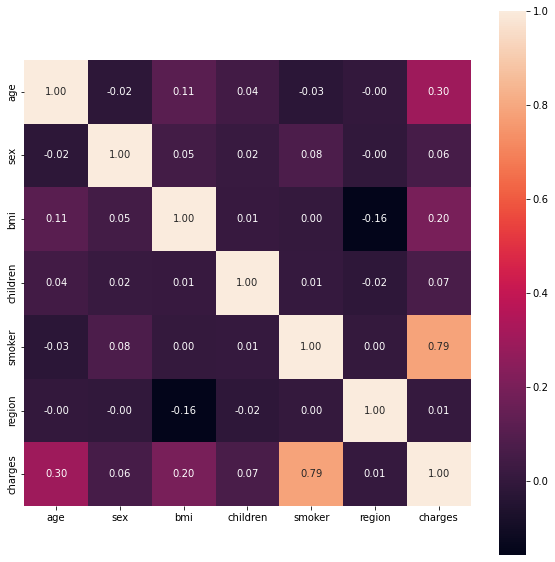

In [13]:
plt.figure(figsize=(10,10))

sns.heatmap(data.corr(),cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 
                 )

# gradian decent regression

In [14]:
class gradian_decent_regression:
    def __init__(self,alpha,epochs,init_coef):
        self.alpha=alpha
        self.epochs=epochs
        self.theta=init_coef
        self.hist_cost=[]
        self.itration=[]
    def cost_function(self,X,Y):
        pred=np.matmul(X,self.theta)
        lost=(1/len(Y))*sum(np.power(Y-pred,2))
        self.hist_cost.append(lost)
        return self.hist_cost
    def G_D_R(self,X_train,y_train):
        y=y_train
        for i in range(epochs):
            f_hat=np.matmul(X_train,self.theta)
            D_theta=(-1/len(data))*(np.matmul(X_train.T, y-f_hat))
            self.theta= self.theta-self.alpha*D_theta
            self.cost_function(X_train,y)
            self.itration.append(i)
        return  self.theta,f_hat  
            
            

In [15]:
#initialize parameter of gradian_decent_regression
alpha=0.001
epochs=10000
coef=np.array([[5,1,2,1,2,1,2]])

In [16]:
X=data_gradiant.iloc[:,:-1]
y=data_gradiant.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
y_train=pd.DataFrame(y_train)

In [17]:
regression=gradian_decent_regression(alpha,epochs,coef.T)
re=regression.G_D_R(X_train.to_numpy(),y_train.to_numpy())


In [18]:
pre_gradian_decent_regression_train=re[1]
MAE_gradian_decent_regression_train= metrics.mean_absolute_error(y_train,pre_gradian_decent_regression_train)
MSE_gradian_decent_regression_train= metrics.mean_squared_error(y_train,pre_gradian_decent_regression_train)
RMSE_gradian_decent_regression_train= np.sqrt(metrics.mean_squared_error(y_train,pre_gradian_decent_regression_train))
R_square_MSE_gradian_decent_regression_train= r2_score(y_train, pre_gradian_decent_regression_train)

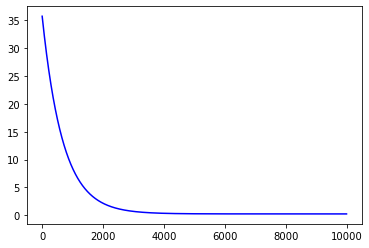

In [19]:
#trend of loss function
plt.plot(regression.itration,regression.hist_cost,color='blue',label = 'lost')
plt.show()

In [20]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [21]:

Y=y_train.to_numpy()
X =X_train[['age','sex','bmi','children','smoker','region']] # here we have 2 variables for the multiple linear regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example



X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     452.6
Date:                Wed, 07 Sep 2022   Prob (F-statistic):          1.05e-271
Time:                        19:39:40   Log-Likelihood:                -696.24
No. Observations:                 936   AIC:                             1406.
Df Residuals:                     929   BIC:                             1440.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0056      0.017     -0.335      0.7

In [22]:
pre_y_train=model.predict(X)
MAE= metrics.mean_absolute_error(y_train,pre_y_train)
MSE= metrics.mean_squared_error(y_train,pre_y_train)
RMSE= np.sqrt(metrics.mean_squared_error(y_train,pre_y_train))
dict_linear={'MAE':[MAE],'MSE':[MSE],'RMSE':[RMSE],'R2_squared':[model.rsquared]}
data_train_accurcy=pd.DataFrame(data=dict_linear,index=['LinearRegression'])              
data_train_accurcy

,MAE,MSE,RMSE,R2_squared
LinearRegression,0.358602,0.259192,0.509109,0.745122


In [23]:
dict_RMSE_gradian_decent_regression_train={'MAE':MAE_gradian_decent_regression_train,
                                           'MSE':MSE_gradian_decent_regression_train,
                                           'RMSE':RMSE_gradian_decent_regression_train,
                                           'R2_squared':R_square_MSE_gradian_decent_regression_train} 
data_train_accurcy=data_train_accurcy.append(pd.Series(dict_RMSE_gradian_decent_regression_train,
                                                       name='gradian_decent_regression'))
data_train_accurcy

C:\Users\MSA\AppData\Local\Temp\ipykernel_15144\3673409495.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_train_accurcy=data_train_accurcy.append(pd.Series(dict_RMSE_gradian_decent_regression_train,


,MAE,MSE,RMSE,R2_squared
LinearRegression,0.358602,0.259192,0.509109,0.745122
gradian_decent_regression,0.359063,0.259216,0.509133,0.745099


# Polynomial Regression

In [24]:
dict_poly={}
X_train=X_train[['age','bmi','smoker']]
pol_reg = LinearRegression()

degree = list(range(2,16))
for n in degree:
    pr = PolynomialFeatures(degree=n)
    X_poly_train = pr.fit_transform(X_train)
    pol_reg.fit(X_poly_train, y_train)
    pre_train=pol_reg.predict(X_poly_train)
    
    MAE= metrics.mean_absolute_error(y_train,pre_train)
    MSE= metrics.mean_squared_error(y_train,pre_train)
    RMSE= np.sqrt(metrics.mean_squared_error(y_train,pre_train))
    r_sq = pol_reg.score(X_poly_train, y_train)
    dict_poly={'MAE':MAE,'MSE':MSE,'RMSE':RMSE,'R2_squared':r_sq} 
    data_train_accurcy=data_train_accurcy.append(pd.Series(dict_poly,name='Polynomial Regression_'+str(n)))
    dict_poly=None
    

C:\Users\MSA\AppData\Local\Temp\ipykernel_15144\3210040612.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_train_accurcy=data_train_accurcy.append(pd.Series(dict_poly,name='Polynomial Regression_'+str(n)))
C:\Users\MSA\AppData\Local\Temp\ipykernel_15144\3210040612.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_train_accurcy=data_train_accurcy.append(pd.Series(dict_poly,name='Polynomial Regression_'+str(n)))
C:\Users\MSA\AppData\Local\Temp\ipykernel_15144\3210040612.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_train_accurcy=data_train_accurcy.append(pd.Series(dict_poly,name='Polynomial Regression_'+str(n)))
C:\Users\MSA\AppData\Local\Temp\ipykernel_15144\3210040612.py:17: FutureWarning: The 

In [25]:
data_train_accurcy

,MAE,MSE,RMSE,R2_squared
LinearRegression,0.358602,0.259192,0.509109,0.745122
gradian_decent_regression,0.359063,0.259216,0.509133,0.745099
Polynomial Regression_2,0.250521,0.166723,0.408317,0.836053
Polynomial Regression_3,0.245885,0.163141,0.403908,0.839574
Polynomial Regression_4,0.236360,0.155080,0.393802,0.847502
Polynomial Regression_5,0.289056,0.195904,0.442610,0.807358
Polynomial Regression_6,0.227727,0.146581,0.382859,0.855859
Polynomial Regression_7,0.222562,0.143571,0.378908,0.858819
Polynomial Regression_8,0.248382,0.161384,0.401726,0.841303
Polynomial Regression_9,0.215864,0.137806,0.371222,0.864488


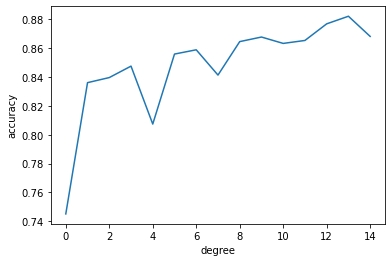

In [26]:
plt.plot(list(range(len(data_train_accurcy.iloc[1:,-1]))),data_train_accurcy.iloc[1:,-1])
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.show()

In [27]:
pr = PolynomialFeatures(degree=14)
X_poly_train = pr.fit_transform(X_train)
pol_reg.fit(X_poly_train, y_train)
pre_train=pol_reg.predict(X_poly_train)

# prediction point and actual cover each other ( polynomial with degree=14)

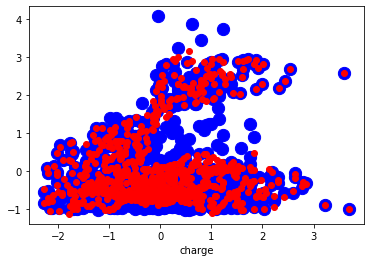

In [28]:
plt.scatter(X_train['bmi'],y_train,color='blue',s=150)
plt.scatter(X_train['bmi'],pre_train,color='red')
plt.xlabel('bmi')
plt.xlabel('charge')
plt.show()

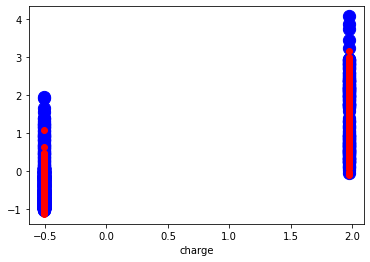

In [29]:
plt.scatter(X_train['smoker'],y_train,color='blue',s=150)
plt.scatter(X_train['smoker'],pre_train,color='red')
plt.xlabel('smoker')
plt.xlabel('charge')
plt.show()

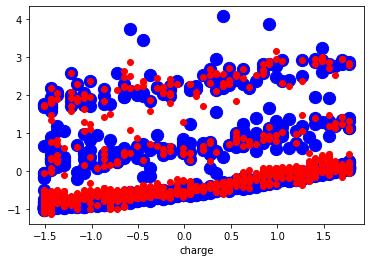

In [30]:
plt.scatter(X_train['age'],y_train,color='blue',s=150)
plt.scatter(X_train['age'],pre_train,color='red')
plt.xlabel('age')
plt.xlabel('charge')
plt.show()